In [476]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


df = pd.read_csv("data\messy_data.csv")

how many rows of data we have?

In [477]:
len(df)

200

let`s remove all whitespace characters from columns names,\n and change x,y,z dimentions whitespaces to '_'

In [478]:
df.columns=df.columns.str.replace(' ','')
df.rename(columns={
    'xdimension':'x_dimension',
    'ydimension':'y_dimension',
    'zdimension':'z_dimension',
},inplace=True)

we can tell that clarity, color and cut will be category type, let`s check those unique values

In [479]:
df['clarity'].unique()
df['color'].unique()
df['cut'].unique()

array([' Ideal', ' premium', ' Good', ' ideal', ' Fair', ' very Good',
       ' good', ' Very good', ' very good', ' fair', ' Premium',
       ' Very Good'], dtype=object)

let`s check how many fields are nan

In [480]:
df.isna().sum()

carat          50
clarity         0
color           0
cut             0
x_dimension     0
y_dimension     0
z_dimension     0
depth           0
table           0
price           0
dtype: int64

that`s strange, let`s replace empty strings with NaNs

In [481]:
df=df.replace(r'^\s*$', np.nan, regex=True)
df.isna().sum()

carat          50
clarity         0
color           0
cut             0
x_dimension     3
y_dimension    64
z_dimension    48
depth          67
table          33
price           4
dtype: int64

seems more legit, lets check columns types

In [482]:
df.dtypes

carat          float64
clarity         object
color           object
cut             object
x_dimension     object
y_dimension     object
z_dimension     object
depth           object
table           object
price           object
dtype: object

that`s not right, lets fix it

In [483]:
df['clarity']=df['clarity'].astype('category')
df['color']=df['color'].astype('category')
df['cut']=df['cut'].astype('category')
df['x_dimension']=df['x_dimension'].astype('float64')
df['y_dimension']=df['y_dimension'].astype('float64')
df['z_dimension']=df['z_dimension'].astype('float64')
df['depth']=df['depth'].astype('float64')
df['table']=df['table'].astype('float64')
df['price']=df['price'].astype('float64')
df.dtypes

carat           float64
clarity        category
color          category
cut            category
x_dimension     float64
y_dimension     float64
z_dimension     float64
depth           float64
table           float64
price           float64
dtype: object

seems legit. now lets remove all duplicates

In [484]:
pre_duplicate_removal_size =len(df)
df.drop_duplicates()
print(f'removed {len(df)-pre_duplicate_removal_size} duplicated rows')


removed 0 duplicated rows


pre_duplicate_removal_size =len(df)
df.drop_duplicates()

no duplicates, that good I suppose. now lets fil those NaNs

In [485]:
df.isna().sum()

carat          50
clarity         0
color           0
cut             0
x_dimension     3
y_dimension    64
z_dimension    48
depth          67
table          33
price           4
dtype: int64

In [486]:
#those two can be mean, overall size of each is less than 5% of data frame
df['price'].fillna(df['price'].mean(), inplace=True)
df['x_dimension'].fillna(df['x_dimension'].mean(), inplace=True)

#lets fil those with median
df['y_dimension'].fillna(df['y_dimension'].median(), inplace=True)
df['z_dimension'].fillna(df['z_dimension'].median(), inplace=True)
df['depth'].fillna(df['depth'].median(), inplace=True)

#and carat with most frequent
df['carat'].fillna(df['carat'].mode().iloc[0], inplace=True)
df['table'].fillna(df['table'].mode().iloc[0], inplace=True)
df.isna().sum()

carat          0
clarity        0
color          0
cut            0
x_dimension    0
y_dimension    0
z_dimension    0
depth          0
table          0
price          0
dtype: int64

move all category names to upper, thus removing human typing errors

In [487]:
df['color']=df['color'].str.upper()
df['cut']=df['cut'].str.upper()
df['clarity']=df['clarity'].str.upper()
df

,carat,clarity,color,cut,x_dimension,y_dimension,z_dimension,depth,table,price
0,0.50,IF,D,IDEAL,5.100000,5.15,3.200,61.5,56.0,3000.0
1,0.70,VVS2,E,PREMIUM,5.700000,5.85,3.520,62.0,59.0,4500.0
2,0.50,SI2,H,GOOD,4.300000,4.31,3.715,62.3,56.0,700.0
3,1.20,IF,D,IDEAL,5.885787,6.82,4.200,61.7,58.0,10000.0
4,0.90,I1,J,FAIR,6.000000,5.85,3.700,61.7,56.0,2400.0
...,...,...,...,...,...,...,...,...,...,...
195,0.45,SI1,F,VERY GOOD,4.900000,4.89,3.715,62.4,59.0,2300.0
196,1.25,VVS2,H,GOOD,6.900000,5.85,4.270,62.3,55.0,10400.0
197,0.55,I1,I,PREMIUM,5.300000,5.85,3.280,62.3,57.0,150000.0
198,0.85,SI2,E,FAIR,6.100000,6.13,3.780,62.3,58.0,6300.0


clarity:

In [488]:
df['clarity'].unique()

array([' IF', ' VVS2', ' SI2', ' I1', ' SI1', ' VVS1'], dtype=object)

color:

In [489]:
df['color'].unique()

array([' D', ' E', ' H', ' J', ' G', ' F', ' I', ' COLORLESS'],
      dtype=object)

"cut:

In [490]:
df['cut'].unique()

array([' IDEAL', ' PREMIUM', ' GOOD', ' FAIR', ' VERY GOOD'], dtype=object)

now let`s translate color colorless to mean of color values(acoring to standarization)

In [491]:
df['color'].replace('COLORLESS','E',inplace=True,regex=True)

now let`s translate categories to numeric - categories scale from internet forums

In [492]:
df['clarity'].replace('FL',11,inplace=True,regex=True)
df['clarity'].replace('IF',10,inplace=True,regex=True)
df['clarity'].replace('VVS2',9,inplace=True,regex=True)
df['clarity'].replace('VVS1',8,inplace=True,regex=True)
df['clarity'].replace('VS2',7,inplace=True,regex=True)
df['clarity'].replace('VS1',6,inplace=True,regex=True)
df['clarity'].replace('SI2',5,inplace=True,regex=True)
df['clarity'].replace('SI1',4,inplace=True,regex=True)
df['clarity'].replace('I1',3,inplace=True,regex=True)
df['clarity'].replace('I2',2,inplace=True,regex=True)
df['clarity'].replace('I3',1,inplace=True,regex=True)

df['color'].replace('D',8,inplace=True,regex=True)
df['color'].replace('E',7,inplace=True,regex=True)
df['color'].replace('F',6,inplace=True,regex=True)
df['color'].replace('G',5,inplace=True,regex=True)
df['color'].replace('H',4,inplace=True,regex=True)
df['color'].replace('I',3,inplace=True,regex=True)
df['color'].replace('J',2,inplace=True,regex=True)
df['color'].replace('K',1,inplace=True,regex=True)

df['cut'].replace('IDEAL',5,inplace=True,regex=True)
df['cut'].replace('PREMIUM',4,inplace=True,regex=True)
df['cut'].replace('GOOD',3,inplace=True,regex=True)
df['cut'].replace('FAIR',2,inplace=True,regex=True)
df['cut'].replace('	VERY GOOD',1,inplace=True,regex=True)

and lets change data type of those columns to numeric

In [493]:
df['clarity']=df['clarity'].astype('float64')
df['color']=df['color'].astype('float64')
df['cut']=df['cut'].astype('float64')

now lets check for outliers

In [494]:
df['carat'].describe()

count    200.00000
mean       0.72425
std        0.30724
min        0.20000
25%        0.50000
50%        0.57500
75%        0.95000
max        1.60000
Name: carat, dtype: float64

In [495]:
df['x_dimension'].describe()

count    200.000000
mean       5.885787
std        0.764344
min        3.900000
25%        5.300000
50%        5.900000
75%        6.500000
max        7.300000
Name: x_dimension, dtype: float64

In [496]:
df['y_dimension'].describe()

count    200.000000
mean       5.836200
std        0.632138
min        3.890000
25%        5.580000
50%        5.850000
75%        6.165000
max        7.280000
Name: y_dimension, dtype: float64

In [497]:
df['z_dimension'].describe()

count    200.000000
mean       3.699550
std        0.402912
min        2.410000
25%        3.477500
50%        3.715000
75%        3.970000
max        4.500000
Name: z_dimension, dtype: float64

In [498]:
df['price'].describe()

count       200.000000
mean      11410.714286
std       39667.884273
min         500.000000
25%        2600.000000
50%        4450.000000
75%        8025.000000
max      350000.000000
Name: price, dtype: float64

price and carat should be cleared of outliers, especially price. lets check if price quantile range of 1 to 99 will do the job 

now for carat, min seems good enought, lets filter max 

In [499]:
df['carat'].describe()

count    200.00000
mean       0.72425
std        0.30724
min        0.20000
25%        0.50000
50%        0.57500
75%        0.95000
max        1.60000
Name: carat, dtype: float64

In [500]:
high = df['carat'].quantile(0.99)
print(f'quantiles 99 = {high}')
print('nope lets go for 95')
high = df['carat'].quantile(0.95)
print(f'quantiles 95 = {high}')
df=df[(df['carat']<=high )]
df['carat'].describe()

quantiles 99 = 1.400999999999999
nope lets go for 95
quantiles 95 = 1.3


count    191.000000
mean       0.691361
std        0.272834
min        0.200000
25%        0.500000
50%        0.550000
75%        0.900000
max        1.300000
Name: carat, dtype: float64

how many records do we have now(199 at the begining)?

In [501]:
len(df)

191

lets stay there, difference is smaller that in original data set

lets see current dataframe

In [502]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
carat,0.50,0.70,0.500,1.200000,0.90,0.50,0.50,0.40,0.500000,1.00,...,0.65,1.15,0.40,0.50,0.95,0.450,1.25,0.55,0.85,0.50
clarity,10.00,9.00,5.000,10.000000,3.00,4.00,10.00,8.00,5.000000,8.00,...,5.00,8.00,5.00,9.00,4.00,4.000,9.00,3.00,5.00,8.00
color,8.00,7.00,4.000,8.000000,2.00,5.00,8.00,6.00,3.000000,6.00,...,6.00,5.00,4.00,7.00,5.00,6.000,4.00,3.00,7.00,5.00
cut,5.00,4.00,3.000,5.000000,2.00,3.00,5.00,3.00,3.000000,5.00,...,3.00,4.00,2.00,3.00,5.00,3.000,3.00,4.00,2.00,3.00
x_dimension,5.10,5.70,4.300,5.885787,6.00,5.90,5.10,4.80,4.300000,6.40,...,5.50,6.80,4.70,6.30,6.40,4.900,6.90,5.30,6.10,6.40
y_dimension,5.15,5.85,4.310,6.820000,5.85,5.92,5.85,4.79,4.320000,5.85,...,5.85,6.85,5.85,5.85,6.42,4.890,5.85,5.85,6.13,6.43
z_dimension,3.20,3.52,3.715,4.200000,3.70,3.63,3.20,2.95,3.715000,4.00,...,3.41,4.23,2.91,3.90,3.96,3.715,4.27,3.28,3.78,3.97
depth,61.50,62.00,62.300,61.700000,61.70,62.30,61.50,62.30,62.300000,62.30,...,62.30,62.70,62.10,62.30,62.30,62.400,62.30,62.30,62.30,62.50
table,56.00,59.00,56.000,58.000000,56.00,57.00,57.00,56.00,56.000000,58.00,...,57.00,56.00,58.00,58.00,56.00,59.000,55.00,57.00,58.00,56.00
price,3000.00,4500.00,700.000,10000.000000,2400.00,4200.00,3100.00,1500.00,11410.714286,7500.00,...,3400.00,9800.00,2000.00,7700.00,7100.00,2300.000,10400.00,150000.00,6300.00,7500.00


not let`s visualize data

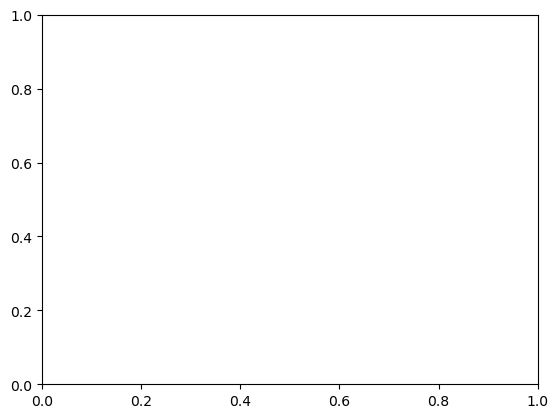

In [503]:
fig, ax = plt.subplots()

In [504]:
df_grouped=df
list_with_categories=("clarity","color","cut","carat", "x_dimension","y_dimension","z_dimension","depth", "table","price")
for x in list_with_categories:
    df_grouped[x]= (df_grouped[x]-df_grouped[x].mean())/df_grouped[x].std()




C:\Users\MJ\AppData\Local\Temp\ipykernel_8248\896890070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped[x]= (df_grouped[x]-df_grouped[x].mean())/df_grouped[x].std()


lets select clarity for example

In [505]:
selected_category="clarity"

draw violn plot

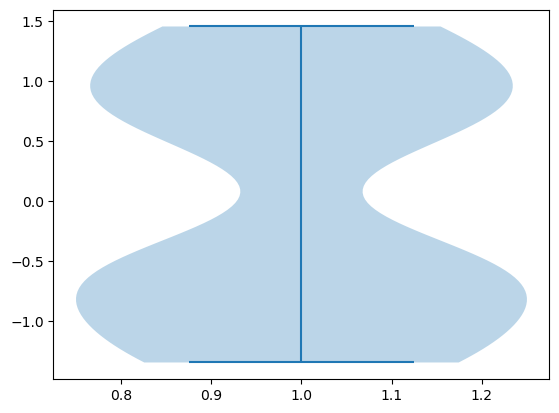

In [506]:
ax.violinplot(df[selected_category])
fig

draw histogram plot

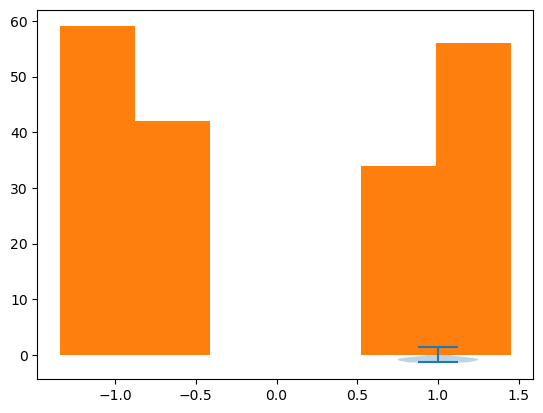

In [507]:
ax.hist(df[selected_category],bins=len(df[selected_category].unique()))
fig

draw box plot

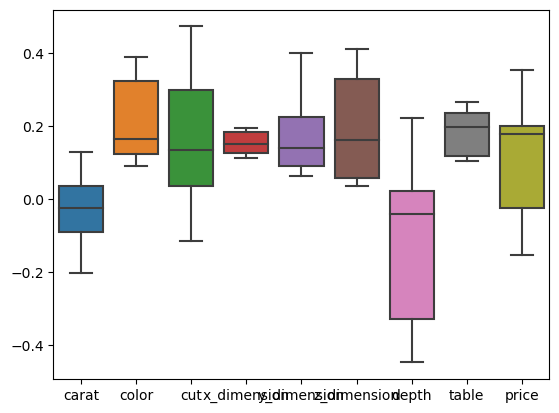

In [508]:
df_grouped=df_grouped.groupby([selected_category]).sum()
df_grouped=df_grouped.div(df_grouped.sum(axis=1), axis=0)
ax=sns.boxplot(df_grouped, showfliers = False)

draw heatmap, figsize set for better color scale

In [509]:
# commented as it is quiet long

# fig, ax = plt.subplots(figsize=(5, 20))
# df_grouped=df_grouped.groupby([selected_category]).sum()
# df_grouped=df_grouped.div(df_grouped.sum(axis=1), axis=0)
# ax=sns.heatmap(df_grouped,annot=True, cmap=plt.cm.hot,vmin=-2,vmax=2, linewidths=.25)

now lets check for single category impact

C:\Users\MJ\AppData\Local\Temp\ipykernel_8248\2648569366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitted[x]= (df_fitted[x]-df_fitted[x].mean())/df_fitted[x].std()
C:\Users\MJ\AppData\Local\Temp\ipykernel_8248\2648569366.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitted['fitted']=model.fittedvalues


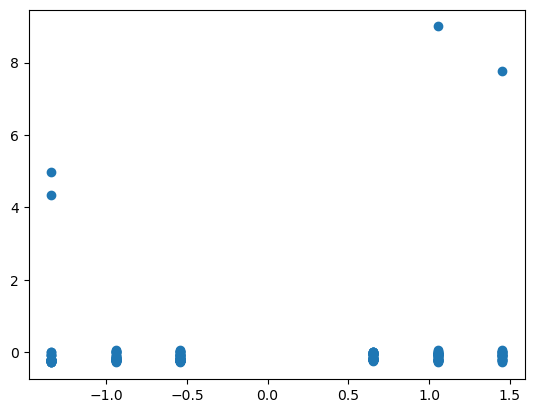

In [510]:
df_fitted=df
fig, ax = plt.subplots()
for x in list_with_categories:
    df_fitted[x]= (df_fitted[x]-df_fitted[x].mean())/df_fitted[x].std()
model = smf.ols(formula="price ~ "+selected_category,data= df).fit()

df_fitted['fitted']=model.fittedvalues
model.summary()
ax.scatter( x=df_fitted[selected_category], y=df_fitted['price'])


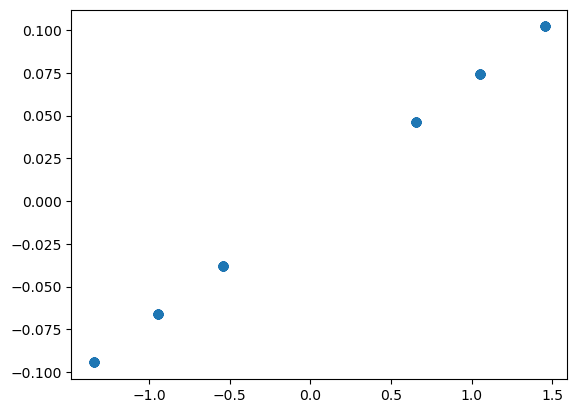

In [511]:
fig, ax = plt.subplots()
ax.scatter( x=df_fitted[selected_category], y=df_fitted['fitted'])

and multiple variables impact

stats

In [512]:
selected_categories=("clarity","color","depth")
formula_string="price ~ "
for x in selected_categories:
    if x.index == 0:
        formula_string=formula_string+" "+x
    else:
        formula_string=formula_string+ " + "+x
model = smf.ols(formula_string,data= df).fit()
df_fitted['fitted']=model.fittedvalues
model.summary()

C:\Users\MJ\AppData\Local\Temp\ipykernel_8248\2382341707.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitted['fitted']=model.fittedvalues


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.4419
Date:                Thu, 01 Feb 2024   Prob (F-statistic):              0.723
Time:                        22:58:35   Log-Likelihood:                -269.84
No. Observations:                 191   AIC:                             547.7
Df Residuals:                     187   BIC:                             560.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.776e-17      0.073  -3.82e-16      1.000      -0.143       0.143
clarity        0.0623      0.075      0.834      0.405      -0.085       0.210
color          0.0460      0.074      0.617      0.538      -0.101       0.193
depth          0.0110      0.073      0.149      0.881      -0.134       0.156
==============================================================================
Omnibus:                      294.485   Durbin-Watson:                   1.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25161.003
Skew:                           7.279   Prob(JB):                         0.00
Kurtosis:                      57.311   Cond. No.                         1.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

correrlation

In [513]:

df_corr=df[df.columns.intersection(list_with_categories).intersection(selected_categories)]
df_corr.corr()

,clarity,color,depth
clarity,1.000000,0.199210,-0.100725
color,0.199210,1.000000,-0.075575
depth,-0.100725,-0.075575,1.000000


ssr

In [514]:
model.ssr

188.66237873523232

and heat map 

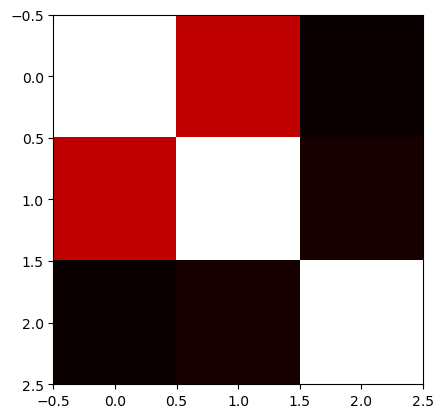

In [515]:
fig, ax = plt.subplots()
ax.imshow(df_corr.corr(),cmap=plt.cm.hot)

now lets do same thing, but for categories selected by author

In [516]:
selected_list=("clarity", "x_dimension","y_dimension","carat","table")
df_selected=df[df.columns.intersection(selected_list)]
for x in selected_list:
    df_selected[x]= (df_selected[x]-df_selected[x].mean())/df_selected[x].std()

C:\Users\MJ\AppData\Local\Temp\ipykernel_8248\974789276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[x]= (df_selected[x]-df_selected[x].mean())/df_selected[x].std()


correlation

In [517]:
df_selected.corr()

,carat,clarity,x_dimension,y_dimension,table
carat,1.000000,0.019994,0.740967,0.577560,0.196143
clarity,0.019994,1.000000,0.139261,0.142337,0.169058
x_dimension,0.740967,0.139261,1.000000,0.830060,0.227010
y_dimension,0.577560,0.142337,0.830060,1.000000,0.181817
table,0.196143,0.169058,0.227010,0.181817,1.000000


model

In [518]:
formula_string="price ~ "
for x in selected_list:
    if x.index == 0:
        formula_string=formula_string+" "+x
    else:
        formula_string=formula_string+ " + "+x
model = smf.ols(formula_string,data= df).fit()

stats

In [519]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.828
Date:                Thu, 01 Feb 2024   Prob (F-statistic):              0.109
Time:                        22:58:35   Log-Likelihood:                -265.91
No. Observations:                 191   AIC:                             543.8
Df Residuals:                     185   BIC:                             563.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.776e-17      0.072  -3.88e-16      1.000      -0.141       0.141
clarity         0.0335      0.074      0.453      0.651      -0.112       0.179
x_dimension     0.3645      0.159      2.300      0.023       0.052       0.677
y_dimension    -0.2059      0.129     -1.591      0.113      -0.461       0.049
carat          -0.1372      0.108     -1.266      0.207      -0.351       0.077
table           0.1074      0.075      1.440      0.152      -0.040       0.255
==============================================================================
Omnibus:                      284.317   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20910.922
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                      52.373   Cond. No.                         4.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ssr

In [520]:
model.ssr

181.05442669836947